[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of athlete_events.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Don't forget to drop duplicates first

In [5]:
data.shape

(271116, 15)

In [6]:
data = data.drop_duplicates()
data.shape

(269731, 15)

In [7]:
for i in data.columns:
  print(i,end=", ")

ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, 

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [8]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [9]:
data.groupby('Sex')['Sex'].count()

Sex
F     74378
M    195353
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [10]:
arr = list(data['City'].drop_duplicates())
print(len(arr),arr)

42 ['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary', 'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City', 'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm', 'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina', 'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich', 'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver', 'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz', 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of [athlete](https://) for each year

In [11]:
data.groupby('Year')['ID'].nunique()

Year
1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3565
1928     3703
1932     2174
1936     5142
1948     5068
1952     5622
1956     4167
1960     6017
1964     6230
1968     6717
1972     8122
1976     7200
1980     6330
1984     8067
1988     9873
1992    11183
1994     1738
1996    10339
1998     2179
2000    10647
2002     2399
2004    10557
2006     2494
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [12]:
print(data.groupby('ID')['Name'].count().max(), data.iloc[data['ID'].value_counts().idxmax(),[0,1]], sep='\n')

39
ID                        54051
Name    Alica Javadov (-Checov)
Name: 106923, dtype: object


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
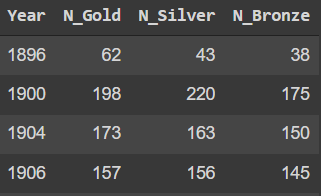

In [13]:
db = data.groupby('Medal')['Year'].get_group('Bronze').value_counts().reset_index().rename(columns = {'index':'Year','Year':'N_Bronze'})
dg = data.groupby('Medal')['Year'].get_group('Gold').value_counts().reset_index().rename(columns = {'index':'Year','Year':'N_Gold'})
ds = data.groupby('Medal')['Year'].get_group('Silver').value_counts().reset_index().rename(columns = {'index':'Year','Year':'N_Silver'})

db.sort_values(by='Year', inplace=True)
dg.sort_values(by='Year', inplace=True)
ds.sort_values(by='Year', inplace=True)

dg['N_Silver'] = ds['N_Silver']
dg['N_Bronze'] = db['N_Bronze']

dg.set_index('Year').T

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
N_Gold,62,198,173,157,294,326,493,332,275,261,...,145,663,162,664,176,671,174,632,202,665
N_Silver,43,197,163,156,281,315,455,332,267,246,...,145,655,157,660,175,667,175,630,220,661
N_Bronze,38,175,159,150,281,300,485,325,256,232,...,145,679,150,703,175,710,171,677,198,710


# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [14]:
dd = data.groupby('Medal')['City'].get_group('Gold').value_counts().reset_index().rename(columns = {'index':'City','City':'#_of_win'})
dd.head()

,City,#_of_win
0,London,1215
1,Athina,883
2,Los Angeles,726
3,Beijing,671
4,Rio de Janeiro,665


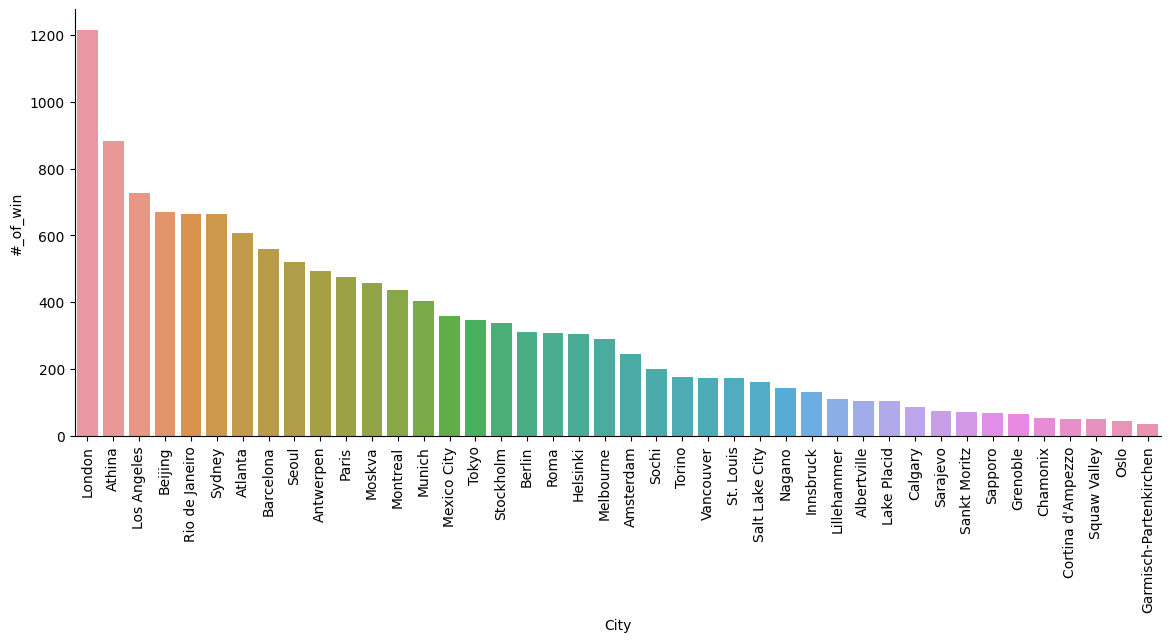

In [15]:
sns.catplot(x="City", y="#_of_win",  kind="bar", data=dd, height=5, aspect=2.5)
plt.xticks(rotation=90);

### Find the total missing data for each year?

,Year,#_of_missing
0,1896,1065
1,1900,5676
2,1904,3331
3,1906,5022
4,1908,8057


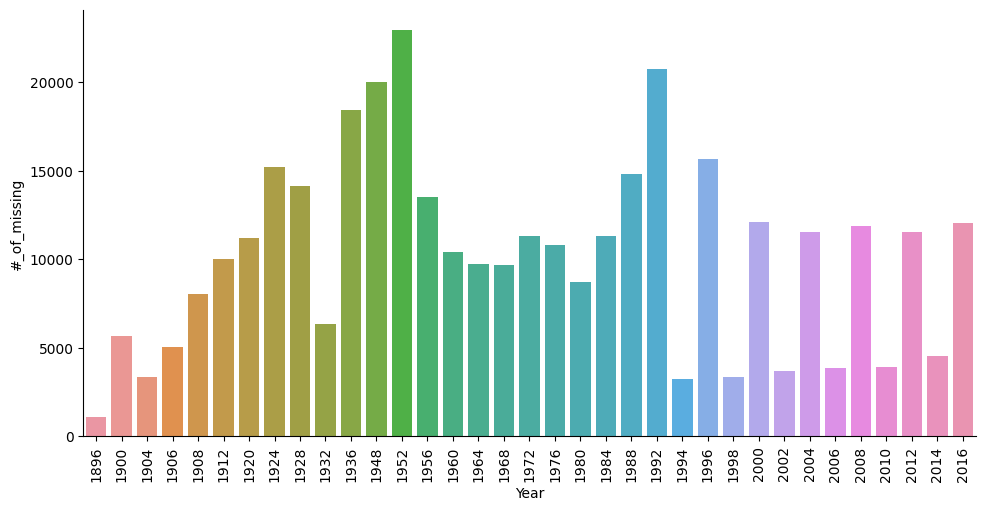

In [16]:
md = data.set_index('Year').isna().groupby('Year').sum().transpose().sum().reset_index().rename(columns = {0:'#_of_missing'})
sns.catplot(x="Year", y="#_of_missing",  kind="bar", data=md, height=5, aspect=2)
plt.xticks(rotation=90);
md.head()

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?




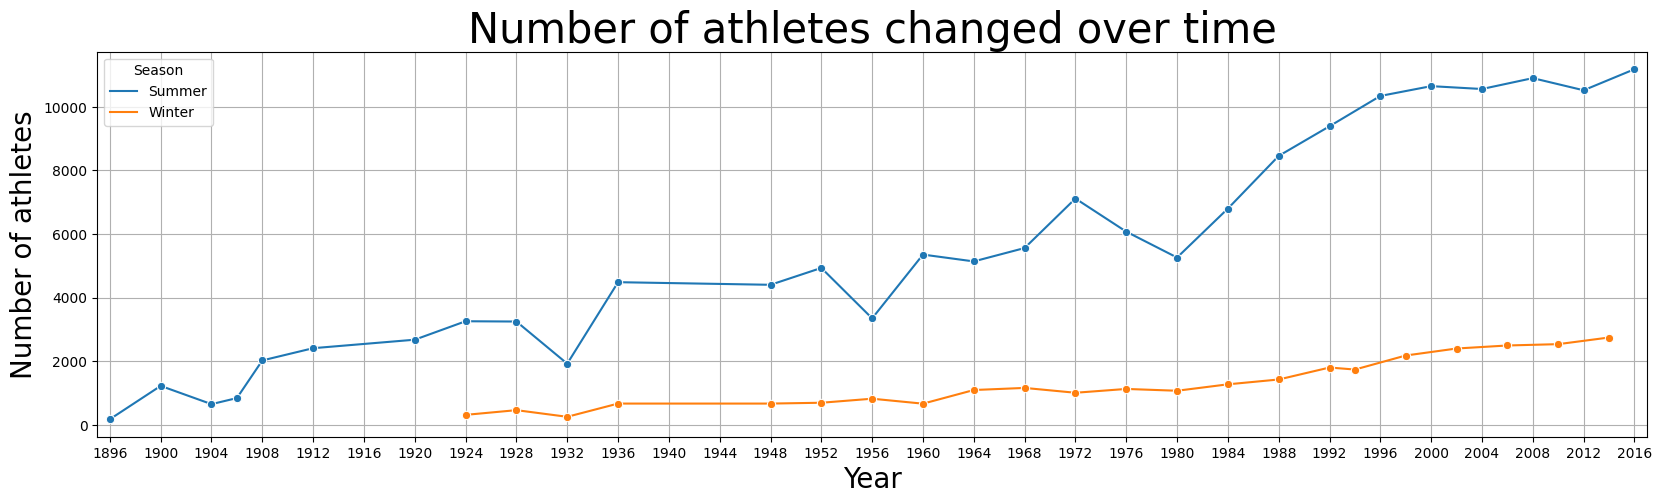

In [26]:
n_athletes_over_years = data.groupby(['Year', 'Season'])['ID'].nunique().sort_index(ascending=False)
n_athletes_over_years

plt.figure(figsize=(20,5))
sns.lineplot(x=n_athletes_over_years.index.get_level_values('Year'), y=n_athletes_over_years.values, hue=n_athletes_over_years.index.get_level_values('Season'), marker='o')
plt.xlabel('Year', size=20)
plt.ylabel('Number of athletes', size=20)
plt.title('Number of athletes changed over time', size=30)
plt.xticks(list(range(1896, 2020))[::4])
plt.xlim(1895,2017)
plt.grid();

In [27]:
#github.com/mohammadalqaisyyy